# ELECTRIC VEHICLES DATASET - DATA  ANALYSIS

Perform Data Cleaning and Data Analysis of the Electric Vehicles Dataset to find the relationship between the columns in the dataset and visualize the same using matplotlib and seaborn.

DATASET SOURCE: https://www.kaggle.com/datasets/geoffnel/evs-one-electric-vehicle-dataset

The data contains information on Electric vehicles and its resepctive specifications

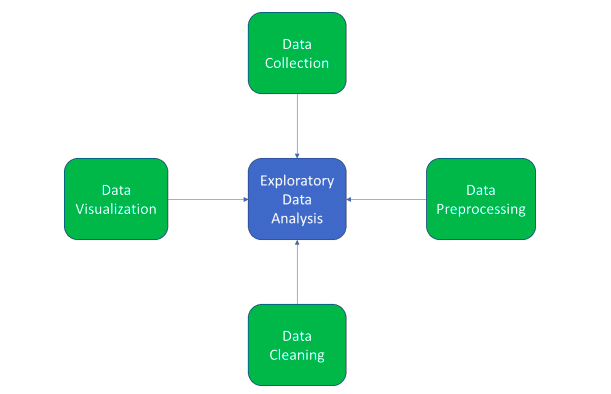

In [48]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
#import dataset
df = pd.read_csv('ElectricCarData_Clean.csv')
#display dataset
df.head(7)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
5,Lucid,Air,2.8,250,610,180,620,Yes,AWD,Type 2 CCS,Sedan,F,5,105000
6,Volkswagen,e-Golf,9.6,150,190,168,220,Yes,FWD,Type 2 CCS,Hatchback,C,5,31900


In [50]:
#display the total number of columns and the column names found in the dataset
len(df.columns)

14

In [51]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [52]:
#display total number of records in the dataset
records = len(df)
records

103

### Data Cleaning

In [53]:
#count number of NaN and Inf values in each column
df.isna().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [54]:
df[df == np.inf].count()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [55]:
#remove blank values from the FastCharge_KmH column
df = df[df.FastCharge_KmH !='-']
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


### Display total number of vehicles avaiable for each Body Style

In [56]:
df1 = pd.DataFrame(df['BodyStyle'].value_counts())
df1

,BodyStyle
SUV,45
Hatchback,29
Sedan,10
Liftback,5
Pickup,3
SPV,2
Cabrio,2
Station,1
MPV,1


Majority of the vehicles have SUV Body Style while the Body Style with least number of vehicles are MPV and Station

### Display a pie chart to find the powertrain type used the most by electric car companies

AWD    41
FWD    36
RWD    21
Name: PowerTrain, dtype: int64


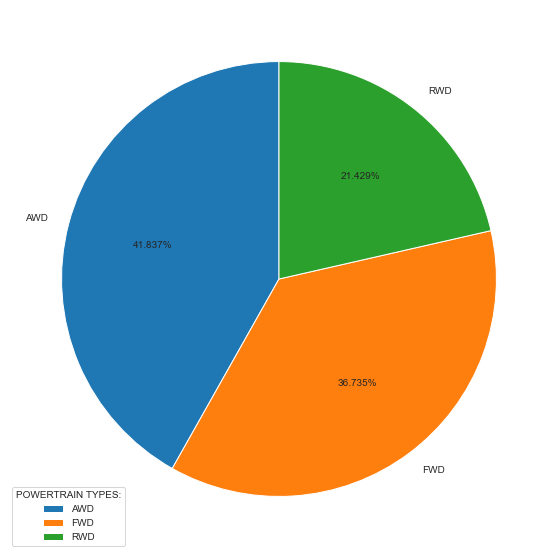

In [57]:
#create figure for graph
fig1 = plt.figure(figsize = (10, 10))
#count number of occurences for each label
vals = df['PowerTrain'].value_counts()
print(vals)
#create a list of labels to display on pie chart
label = vals.index
#create pie chart
plt.pie(vals,labels=label, autopct='%.3f%%',
        shadow=False, startangle=90)
plt.legend(title = "POWERTRAIN TYPES:")
plt.show()

The Powertrain type used by vehicle companies the most is AWD

### Find out whether Range_Km and PriceEuro are correlated using scatter plot

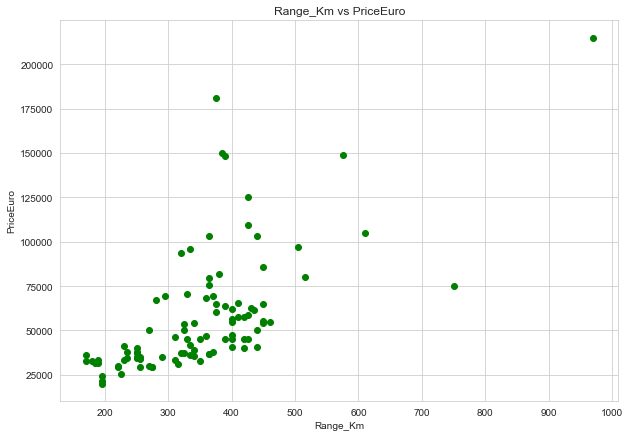

In [58]:
#create figure for plotting
fig2 = plt.figure(figsize = (10, 7))

x2 = df['Range_Km']
y2 = df['PriceEuro']

#create scatter plot
plt.scatter(x2,y2,color = 'green')
#display labels for the graph
plt.xlabel("Range_Km")
plt.ylabel("PriceEuro")
plt.title("Range_Km vs PriceEuro")

plt.show()

The above plot shows that there is a positive correaltion between the two column values

### Display brand and model of vehicles without Rapid Charge

In [59]:
#run a query to display the result
df3 = pd.DataFrame(df.query('RapidCharge == "No"')[['Brand','Model','RapidCharge']])
df3

,Brand,Model,RapidCharge


In [60]:
#for verification
df['RapidCharge'].value_counts()

Yes    98
Name: RapidCharge, dtype: int64

### Display brand and model of the vehicle with highest value in FastCharge_KmH column

In [61]:
df4=df[df.FastCharge_KmH == df.FastCharge_KmH.max()][['Brand','Model','FastCharge_KmH']]
df5=df[df.FastCharge_KmH == df.FastCharge_KmH.min()][['Brand','Model','FastCharge_KmH']]

In [62]:
print("Vehicle with Highest Fast Charge KmH:")
df4

Vehicle with Highest Fast Charge KmH:


,Brand,Model,FastCharge_KmH
0,Tesla,Model 3 Long Range Dual Motor,940


In [63]:
print("Vehicle with Lowest Fast Charge KmH:")
df5

Vehicle with Lowest Fast Charge KmH:


,Brand,Model,FastCharge_KmH
17,Volkswagen,e-Up!,170
43,Skoda,CITIGOe iV,170
44,SEAT,Mii Electric,170


### Display number of models released by each vehicle brand and find the brand with most number of models using bar graph

<BarContainer object of 32 artists>

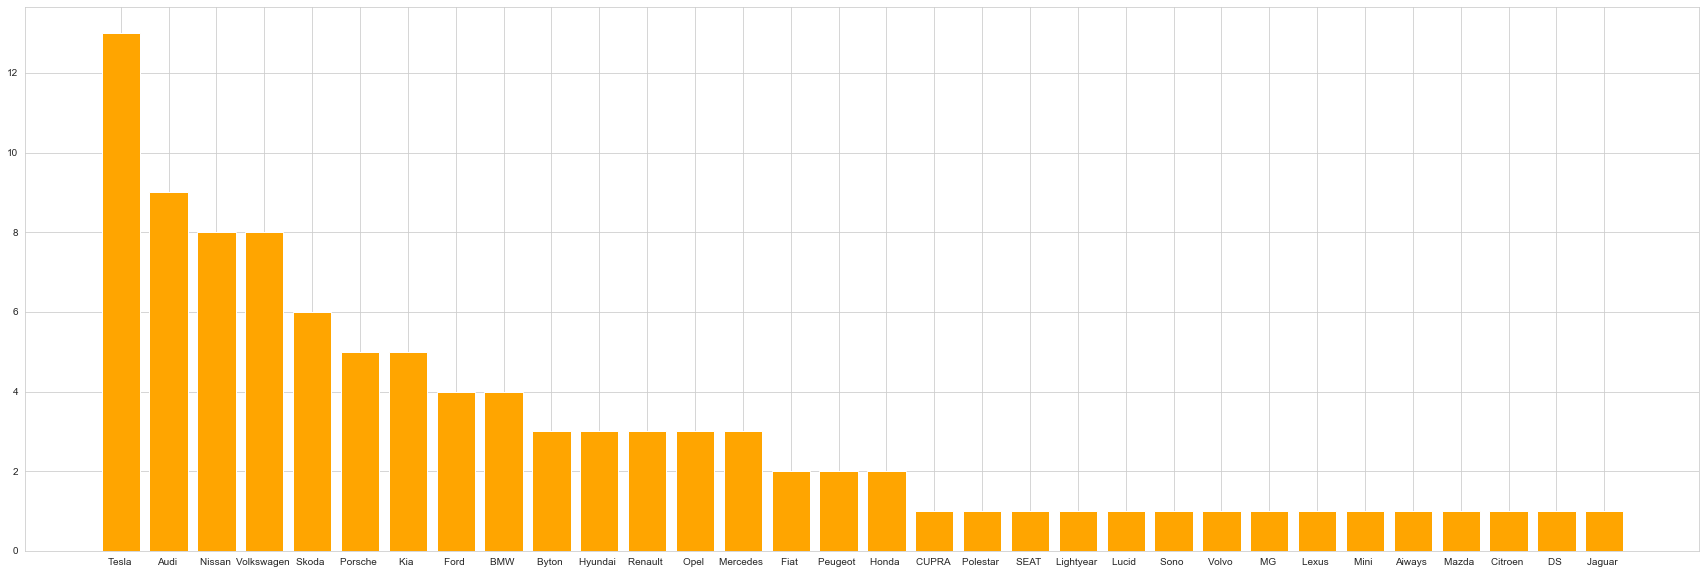

In [64]:
fig6 = plt.figure(figsize=(30,10))
x6 = df['Brand'].value_counts()
#display the bar graph
plt.bar(x6.index,x6,color='orange')

Telsa has the most number of models according to the above graph

### Visualize the dataset columns Range_Km and Brand to find the brand with highest and lowest Range_Km

<BarContainer object of 98 artists>

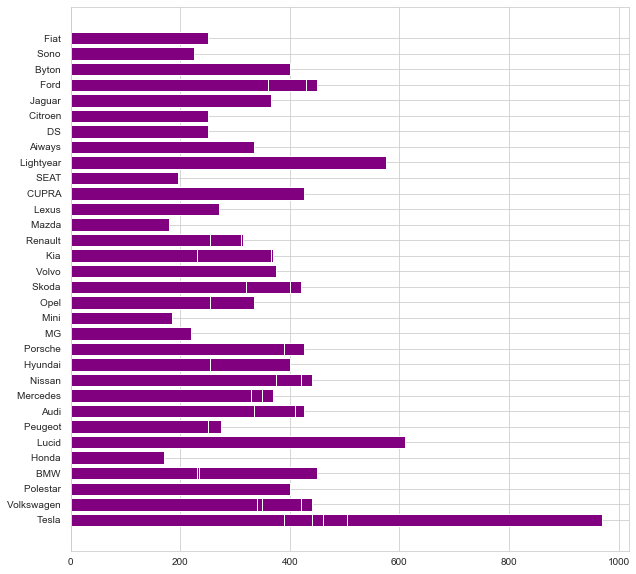

In [65]:
fig7 = plt.figure(figsize=(10,10))
x=df['Range_Km']
y=df['Brand']
#plot a horizontal bar graph
plt.barh(y,x,color='purple')

Telsa has the highest Range_Km value while Honda has the lowest Range_Km value

### Analyse the columns PlugType and PriceEuro using Swarmplot from Seaborn Library

C:\Users\Aishwarya Menon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Aishwarya Menon\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'PriceEuro vs PlugType')

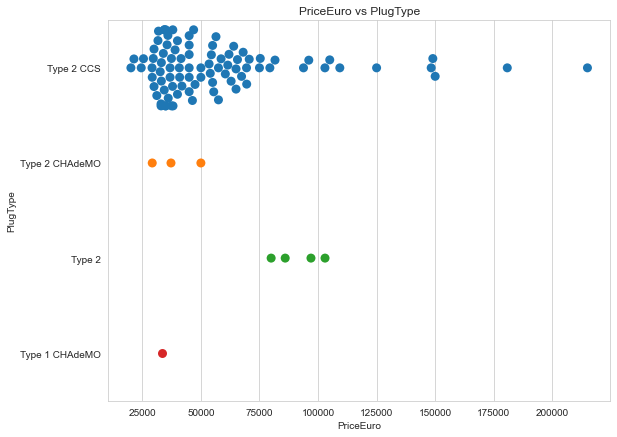

In [66]:
fig8 = plt.figure(figsize=(9,7))
x=df['PriceEuro']
y=df['PlugType']
#plot a swarmplot
sns.swarmplot(x,y,data=df,size = 9)
plt.title('PriceEuro vs PlugType')

The above swarmplot shows that majority of the vehicles have the PlugType called Type 2 CCS. 
The vehicles with Type 2 CCS Plug are found to have its Price Range over a large scale compared to the vehciles with other plugtypes being restricted to a smaller price range.
Type 2 CCs PlugType vehicles have vehicles with the least price and the highest price.

### Find out the average number of seats offered by all vehicle brands

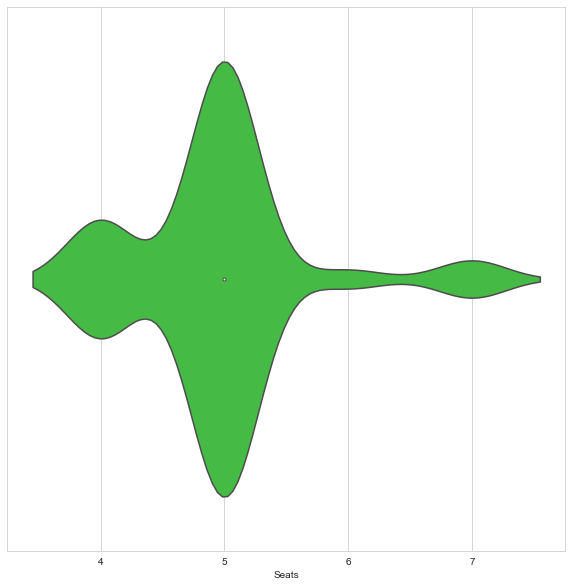

In [67]:
fig8 = plt.figure(figsize=(10,10))
#plot a violin plot
plt1 = sns.violinplot(x=df["Seats"],color='limegreen')
plt.show()

### Find the vehicle Segment with the highest Efficiency_WhKm

<AxesSubplot:xlabel='Efficiency_WhKm', ylabel='Segment'>

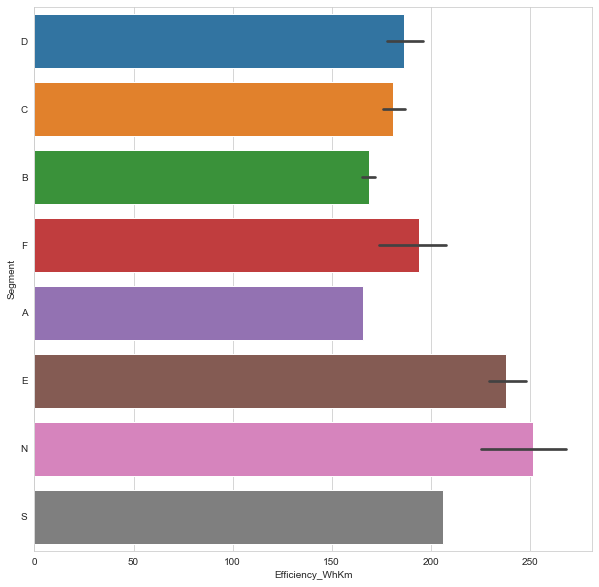

In [68]:
fig9 = plt.figure(figsize=(10,10))
#plot a barplot using seaborn
sns.barplot(data=df, x=df["Efficiency_WhKm"], y=df["Segment"])

The vehicles belonging to the Segment N have the best/highest Efficiency_WhKm value